(4000, 8)
3.9198508501661324


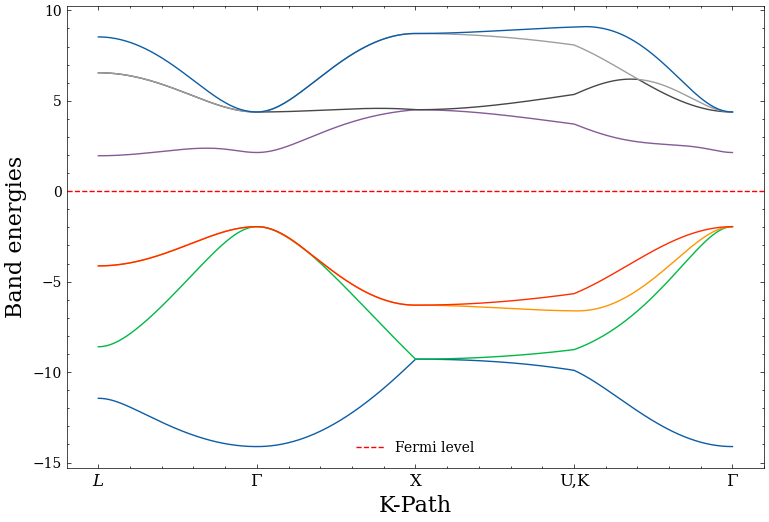

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class Tetrahedral:
    def __init__(self):
        pass
    def phase(self, k, distance):
        '''
        Calculate phase factors for tetrahedral symmetry

        args:
            k: array of k-points
            distance: array of distances between k-points

        returns:
            array of phase factors

        '''
        a, b, c, d = [np.exp(1j * np.dot(k, ds)) for ds in distance]
        factors = np.array([
            a + b + c + d,
            a + b - c - d,
            a - b + c - d,
            a - b - c + d
            ])
        return (1/4) * factors
        
    def band_energies(self, g, es, ep, vss, vsp, vxx, vxy):
        '''
        Calculate band energies for tetrahedral symmetry

        args:
            g: array of phase factors
            es: s-band energy
            ep: p-band energy
            vss: s-s hopping parameter
            vsp: s-p hopping parameter
            vxx: p-p hopping parameter
            vxy: p-p hopping parameter

        returns:
            array of band energies

        '''
        g1, g2, g3, g4 = g
        gc1, gc2, gc3, gc4 = np.conj(g)
        hamiltonian = np.array([
            [es, vss*g1, 0, 0, 0, vsp*g2, vsp*g3, vsp*g4],
            [vss*gc1, es, -vsp*gc2, -vsp*gc3, -vsp*gc4, 0, 0, 0],
            [0, -vsp*g2, ep, 0, 0, vxx*g1, vxy*g4, vxy*g2],
            [0, -vsp*g3, 0, ep, 0, vxy*g4, vxx*g1, vxy*g2],
            [0, -vsp*g4, 0, 0, ep, vxy*g2, vxy*g3, vxx*g1],
            [vsp*gc2, 0, vxx*gc1, vxy*gc4, vxy*gc2, ep, 0, 0],
            [vsp*gc3, 0, vxy*gc4, vxx*gc1, vxy*gc3, 0, ep, 0],
            [vsp*gc4, 0, vxy*gc2, vxy*gc2, vxx*gc1, 0, 0, ep]
            ])
        # print(hamiltonian)
        eigenvalues = np.linalg.eigvalsh(hamiltonian)
        eigenvalues.sort()
        return eigenvalues
    
    def band_structure(self, distance, path, *args):
        '''
        Calculate band structure for tetrahedral symmetry

        args:
            distance: array of distances between k-points
            path: array of a path of k-points
            *args: s, p, and hopping parameters

        returns:
            array of band energies
            
        '''
        
        bands = np.zeros((len(path), 8))
        for i, k in enumerate(path):
            g = self.phase(k, distance)
            energies = self.band_energies(g, *args)
            bands[i] = energies
        
        return bands
    
    def compute_path(self, k1, k2, n=100, endpoint=True):
        '''
        Compute path of k-points

        args:
            k1: start point
            k2: end point
            n: number of points
            endpoint: include endpoint

        returns:
            array of k-points

        '''

        spacing = np.linspace(k1, k2, n, endpoint)

        return spacing

    def plot_band_structure(self, bands, path):
        '''
        Plot band structure

        args:
            bands: array of band energies
            path: array of k-points

        '''

        # use plot_theme.mplstyle to set plot theme
        plt.style.use('/Users/zhangtangwai/Desktop/bandstructure/bandstructure/tight_binding/bandstructure/plot_theme.mplstyle')
        fig, ax = plt.subplots()
        x = np.linspace(0, len(path), len(path), endpoint=True)

        # fermi level
        Eg = min(bands[:, 4]) - max(bands[:, 3])
        Ef = max(bands[:, 3]) + Eg/2
        print(Eg)
        plt.axhline(y = 0, color = 'r', linestyle = '--', label='Fermi level')
        plt.legend()

        for i in range(8):
            ax.plot(x, bands[:, i]-Ef)
        # customizing plot
        xticks = [0, len(path)/4, len(path)/2, 3*len(path)/4, len(path)]
        ax.set_xticks(xticks, ['$L$', '$\Gamma$', 'X', 'U,K', '$\Gamma$'])
        ax.set_xlabel('K-Path')
        ax.set_ylabel('Band energies')

        plt.show()
            
if __name__ == '__main__':
    # parameters Es, Ep, Vss, Vsp, Vxx, Vxy
    # Ep - Es = 7.20
    args = (-4.03, 3.17, -8.13, 5.88, 3.17, 7.51)

    # k-points per path
    n = 1000

    # lattice constant
    a = 1

    # nearest neighbor distance
    d = a / 4 * np.array([
        [1, 1, 1],
        [1, -1, -1],
        [-1, 1, -1],
        [-1, -1, 1]
    ])

    # sysmmetry points in the BZ
    G = 2 * np.pi / a * np.array([0, 0, 0])
    K = 2 * np.pi / a * np.array([3/4, 3/4, 0])
    L = 2 * np.pi / a * np.array([1/2, 1/2, 1/2])
    U = 2 * np.pi / a * np.array([1/4, 1/4, 1])
    W = 2 * np.pi / a * np.array([1, 1/2, 0])
    X = 2 * np.pi / a * np.array([0, 0, 1])

    # tretrahedral
    t = Tetrahedral()

    # k-paths
    lambd = t.compute_path(L, G, n, endpoint=False)
    delta = t.compute_path(G, X, n, endpoint=False)
    x_uk = t.compute_path(X, U, n, endpoint=False)
    sigma = t.compute_path(K, G, n, endpoint=True)
    path = np.concatenate((lambd, delta, x_uk, sigma), axis=0)

    # band structure
    bands = t.band_structure(d, path, *args)
    print(np.shape(bands))
    # plot
    t.plot_band_structure(bands, path)

